# Quickstart

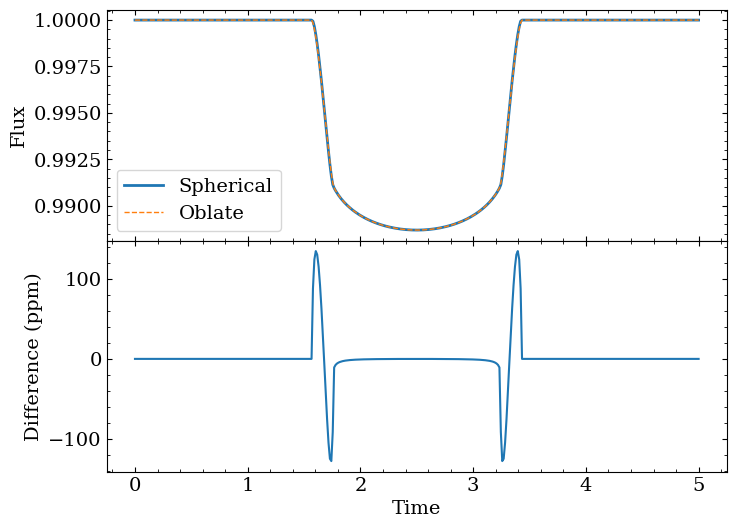

In [1]:
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
from squishyplanet import OblateSystem
import matplotlib.pyplot as plt

state1 = {
    "t_peri" : 0.0,
    "times" : jnp.linspace(0.0, 5, 400),
    "a" : 2.0,
    "period" : 10,
    "r" : 0.1,
    "ld_u_coeffs":jnp.array([0.3, 0.1]),}
s1 = OblateSystem(**state1)

state2 = {
    "t_peri" : 0.0,
    "times" : jnp.linspace(0.0, 5, 400),
    "a" : 2.0,
    "period" : 10,
    "r" : 0.1/jnp.sqrt((1-0.1)),
    "f1" : 0.1,
    "ld_u_coeffs":jnp.array([0.3, 0.1]),}
s2 = OblateSystem(**state2)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
ax[0].plot(s1.state["times"], s1.lightcurve(), lw=2, label="Spherical")
ax[0].plot(s2.state["times"], s2.lightcurve(), lw=1, linestyle="--", label="Oblate")
ax[0].set(ylabel="Flux")
ax[0].legend()
ax[1].plot(s1.state["times"], (s1.lightcurve() - s2.lightcurve())*1e6)
ax[1].set(xlabel="Time", ylabel="Difference (ppm)")

fig.subplots_adjust(hspace=0);
